### Data Dictionary

Internet privacy has gained widespread attention in recent years. 
To measure the degree to which people are concerned about hot-button issues like Internet privacy, social scientists conduct polls in which they interview a large number of people about the topic.


- Internet.Use: A binary variable indicating if the interviewee uses the Internet, at least occasionally (equals 1 if the interviewee uses the Internet, and equals 0 if the interviewee does not use the Internet).
- Smartphone: A binary variable indicating if the interviewee has a smartphone (equals 1 if they do have a smartphone, and equals 0 if they don't have a smartphone).
- Sex: Male or Female.
- Age: Age in years.
- State: State of residence of the interviewee.
- Region: Census region of the interviewee (Midwest, Northeast, South, or West).
- Conservativeness: Self-described level of conservativeness of interviewee, from 1 (very liberal) to 5 (very conservative).
-   Info.On.Internet: Number of the following items this interviewee believes to be available on the Internet for others to see: (1) Their email address; (2) Their home address; (3) Their home phone number; (4) Their cell phone number; (5) The employer/company they work for; (6) Their political party or political affiliation; (7) Things they've written that have their name on it; (8) A photo of them; (9) A video of them; (10) Which groups or organizations they belong to; and (11) Their birth date.
-    Worry.About.Info: A binary variable indicating if the interviewee worries about how much information is available about them on the Internet (equals 1 if they worry, and equals 0 if they don't worry).
-    Privacy.Importance: A score from 0 (privacy is not too important) to 100 (privacy is very important), which combines the degree to which they find privacy important in the following: (1) The websites they browse; (2) Knowledge of the place they are located when they use the Internet; (3) The content and files they download; (4) The times of day they are online; (5) The applications or programs they use; (6) The searches they perform; (7) The content of their email; (8) The people they exchange email with; and (9) The content of their online chats or hangouts with others.
-    Anonymity.Possible: A binary variable indicating if the interviewee thinks it's possible to use the Internet anonymously, meaning in such a way that online activities can't be traced back to them (equals 1 if he/she believes you can, and equals 0 if he/she believes you can't).
-    Tried.Masking.Identity: A binary variable indicating if the interviewee has ever tried to mask his/her identity when using the Internet (equals 1 if he/she has tried to mask his/her identity, and equals 0 if he/she has not tried to mask his/her identity).
-   Privacy.Laws.Effective: A binary variable indicating if the interviewee believes United States law provides reasonable privacy protection for Internet users (equals 1 if he/she believes it does, and equals 0 if he/she believes it doesn't).


### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import to_graphviz, plot_importance

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import _hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingRegressor

%matplotlib inline
sns.set_style('dark')

from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, mean_squared_error,r2_score
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve, accuracy_score

import keras
from keras.models import save_model, Sequential
from keras.layers import Activation, BatchNormalization, Dense
from keras.optimizers import Adam

import feature_engine.missing_data_imputers as mdi

pd.options.display.max_columns= None
#pd.options.display.max_rows = None

Using TensorFlow backend.


### Data Exploration

In [2]:
df = pd.read_csv("AnonymityPoll.csv",low_memory=False)

In [3]:
df

,Internetuse,Smartphone,Sex,Age,State,Region,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,0.0,1.0,Female,70.0,New Jersey,Northeast,4.0,0.0,0.0,NaN,0.0,0.0,NaN
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
4,0.0,NaN,Female,80.0,Georgia,South,4.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,1.0,1.0,Female,57.0,Utah,West,4.0,7.0,1.0,27.777778,0.0,0.0,1.0
998,0.0,NaN,Male,29.0,Colorado,West,3.0,NaN,NaN,NaN,NaN,NaN,0.0
999,1.0,1.0,Male,22.0,California,West,4.0,6.0,0.0,11.111111,0.0,0.0,1.0
1000,0.0,0.0,Female,63.0,California,West,4.0,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Internetuse           1001 non-null   float64
 1   Smartphone            959 non-null    float64
 2   Sex                   1002 non-null   object 
 3   Age                   975 non-null    float64
 4   State                 1002 non-null   object 
 5   Region                1002 non-null   object 
 6   Conservativeness      940 non-null    float64
 7   Infooninternet        792 non-null    float64
 8   Worryaboutinfo        790 non-null    float64
 9   Privacyimportance     787 non-null    float64
 10  Anonymitypossible     753 non-null    float64
 11  Triedmaskingidentity  784 non-null    float64
 12  Privacylawseffective  894 non-null    float64
dtypes: float64(10), object(3)
memory usage: 101.9+ KB


In [5]:
df.describe(include='all')

,Internetuse,Smartphone,Sex,Age,State,Region,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
count,1001.000000,959.000000,1002,975.000000,1002,1002,940.000000,792.000000,790.000000,787.000000,753.000000,784.000000,894.000000
unique,NaN,NaN,2,NaN,49,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Female,NaN,California,South,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,505,NaN,103,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.774226,0.507821,NaN,52.370256,NaN,NaN,3.276596,3.795455,0.488608,62.848672,0.369190,0.163265,0.261745
std,0.418300,0.500200,NaN,18.597082,NaN,NaN,1.012218,2.699174,0.500187,31.472764,0.482906,0.369844,0.439831
min,0.000000,0.000000,NaN,18.000000,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,NaN,37.000000,NaN,NaN,3.000000,2.000000,0.000000,41.428571,0.000000,0.000000,0.000000
50%,1.000000,1.000000,NaN,55.000000,NaN,NaN,3.000000,4.000000,0.000000,68.750000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,NaN,66.000000,NaN,NaN,4.000000,6.000000,1.000000,88.888889,1.000000,0.000000,1.000000


In [6]:
df.shape

(1002, 13)

### Data Visualization

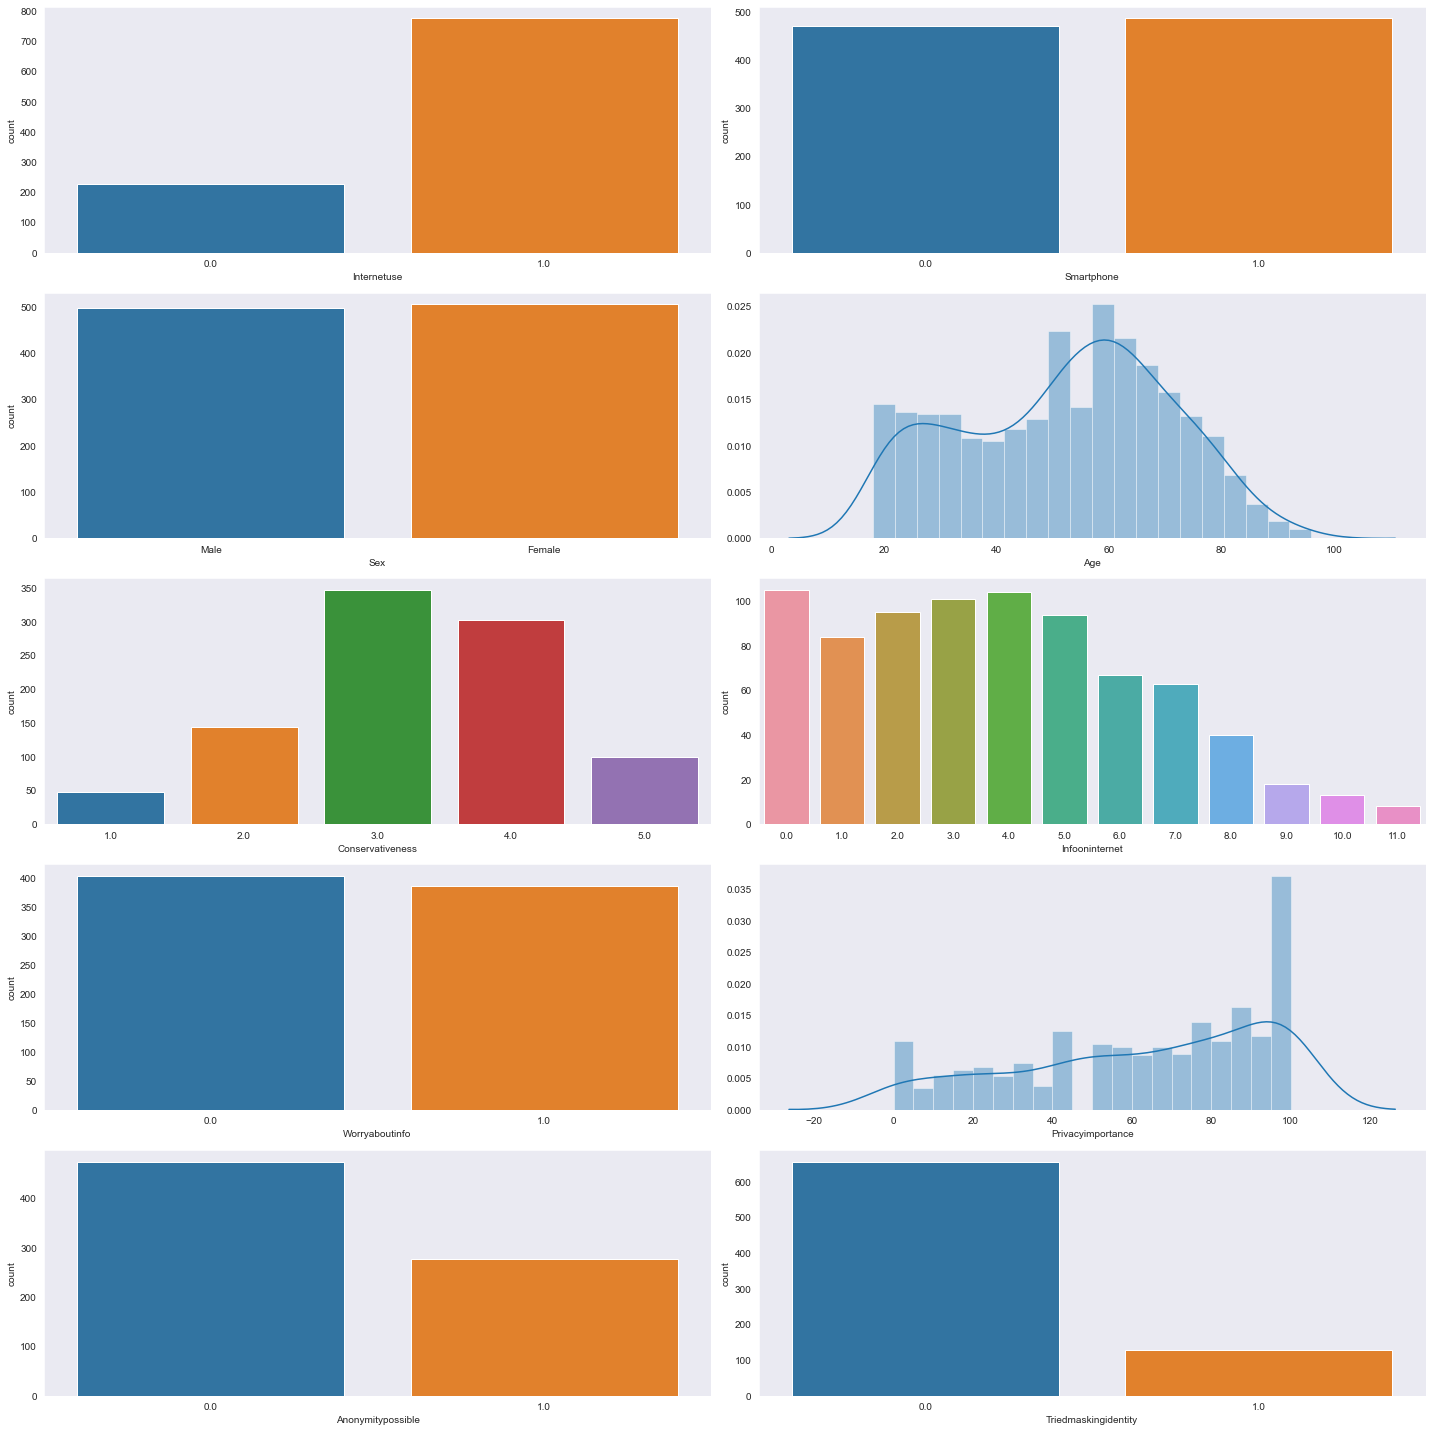

In [7]:
fig = plt.figure(figsize=(20,20))

plt.subplot(5,2,1)
sns.countplot(x=df.Internetuse)
plt.subplot(5,2,2)
sns.countplot(x=df.Smartphone)
plt.subplot(5,2,3)
sns.countplot(x=df.Sex)
plt.subplot(5,2,4)
sns.distplot(df.Age,bins=20)
plt.subplot(5,2,5)
sns.countplot(df.Conservativeness)
plt.subplot(5,2,6)
sns.countplot(df.Infooninternet)
plt.subplot(5,2,7)
sns.countplot(df.Worryaboutinfo)
plt.subplot(5,2,8)
sns.distplot(df.Privacyimportance,bins=20)
plt.subplot(5,2,9)
sns.countplot(df.Anonymitypossible)
plt.subplot(5,2,10)
sns.countplot(df.Triedmaskingidentity)

plt.tight_layout()
plt.show()

In [8]:
df.corr()

,Internetuse,Smartphone,Age,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
Internetuse,1.000000,0.440405,-0.400645,-0.070018,0.153486,0.092603,0.085597,0.030288,0.039350,-0.037027
Smartphone,0.440405,1.000000,-0.424499,-0.104696,0.257519,0.015773,0.033153,-0.009455,0.097594,0.016636
Age,-0.400645,-0.424499,1.000000,0.142979,-0.240954,-0.029966,0.026346,-0.064908,-0.134749,-0.046645
Conservativeness,-0.070018,-0.104696,0.142979,1.000000,-0.144294,-0.037474,0.022537,0.002655,-0.039582,-0.009786
Infooninternet,0.153486,0.257519,-0.240954,-0.144294,1.000000,0.082740,0.013939,-0.013371,0.140345,0.023372
Worryaboutinfo,0.092603,0.015773,-0.029966,-0.037474,0.082740,1.000000,0.312562,-0.044148,0.134644,-0.157988
Privacyimportance,0.085597,0.033153,0.026346,0.022537,0.013939,0.312562,1.000000,-0.095005,0.095785,-0.211150
Anonymitypossible,0.030288,-0.009455,-0.064908,0.002655,-0.013371,-0.044148,-0.095005,1.000000,0.024107,0.054268
Triedmaskingidentity,0.039350,0.097594,-0.134749,-0.039582,0.140345,0.134644,0.095785,0.024107,1.000000,-0.059338
Privacylawseffective,-0.037027,0.016636,-0.046645,-0.009786,0.023372,-0.157988,-0.211150,0.054268,-0.059338,1.000000


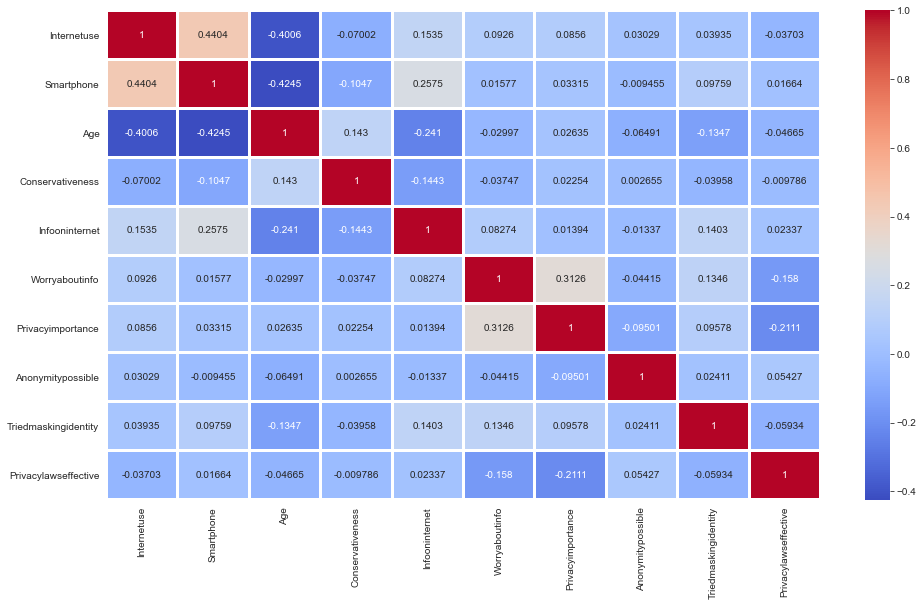

In [9]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),cmap="coolwarm",annot=True,fmt='.4g',linewidths=2)
plt.show()

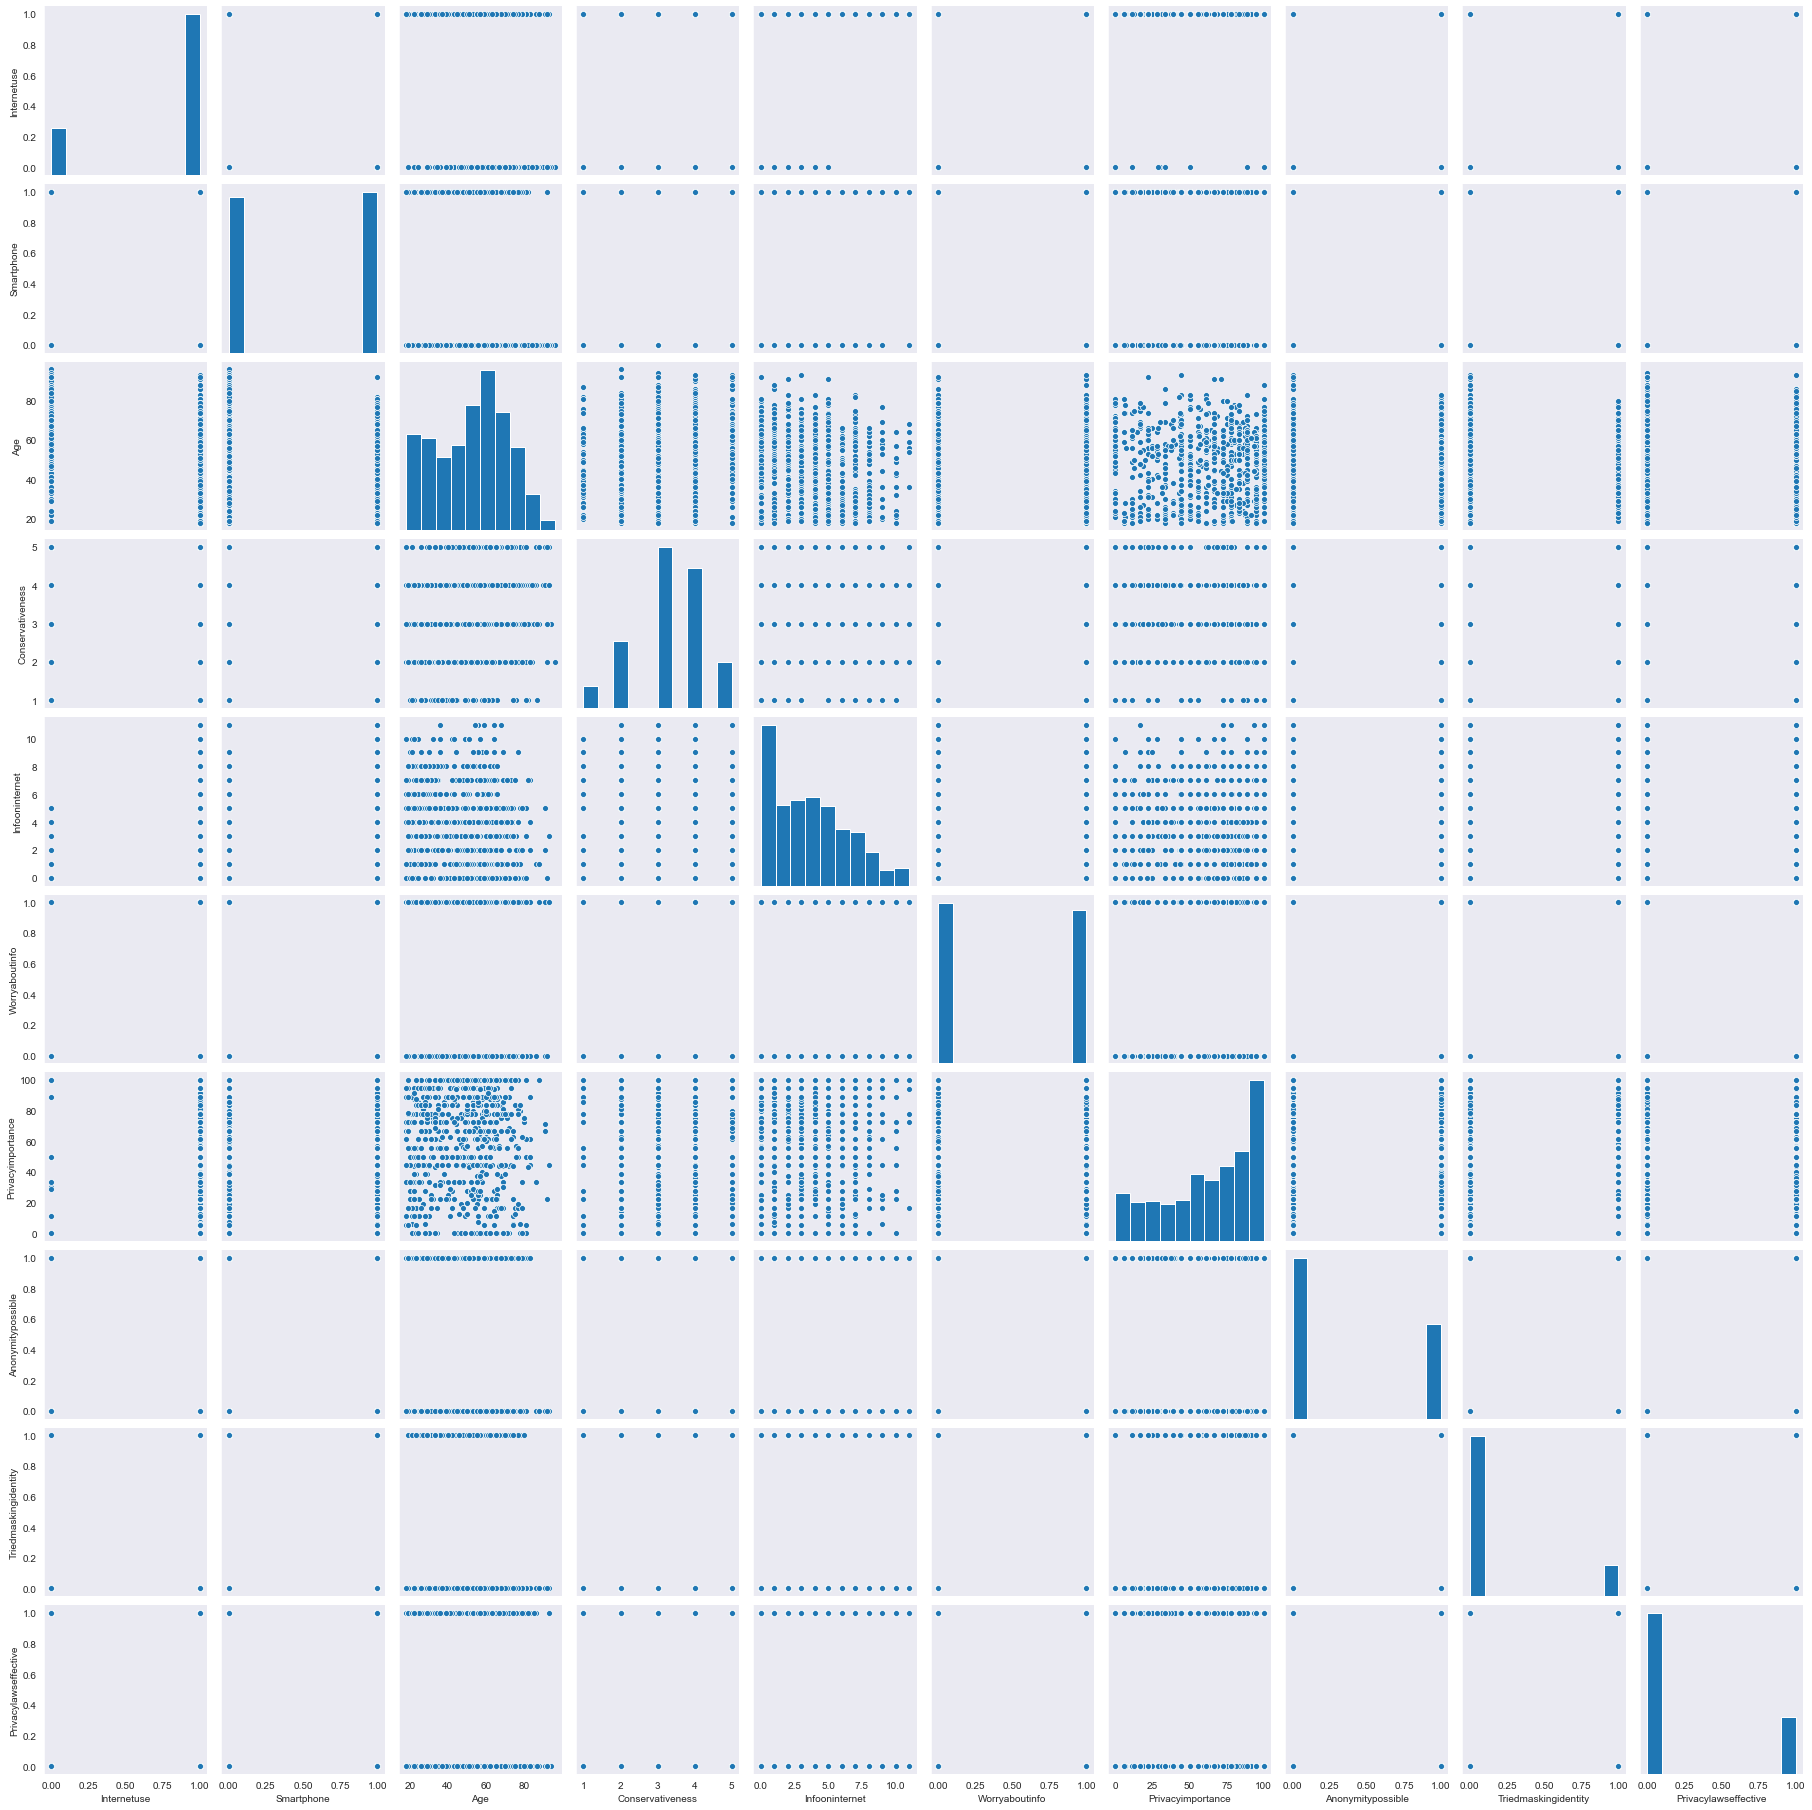

In [10]:
sns.pairplot(df)
plt.show()

### Data Preprocessing

### Treat Missing Values

In [11]:
df.isnull().sum()

Internetuse               1
Smartphone               43
Sex                       0
Age                      27
State                     0
Region                    0
Conservativeness         62
Infooninternet          210
Worryaboutinfo          212
Privacyimportance       215
Anonymitypossible       249
Triedmaskingidentity    218
Privacylawseffective    108
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df

,Internetuse,Smartphone,Sex,Age,State,Region,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
3,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
5,1.0,1.0,Male,49.0,Tennessee,South,4.0,6.0,0.0,88.888889,1.0,1.0,0.0
6,1.0,0.0,Female,52.0,Michigan,Midwest,3.0,3.0,1.0,33.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.0,1.0,Female,30.0,Arizona,West,2.0,5.0,0.0,94.444444,1.0,0.0,0.0
996,1.0,1.0,Male,29.0,California,West,3.0,7.0,1.0,77.777778,1.0,1.0,1.0
997,1.0,1.0,Female,57.0,Utah,West,4.0,7.0,1.0,27.777778,0.0,0.0,1.0
999,1.0,1.0,Male,22.0,California,West,4.0,6.0,0.0,11.111111,0.0,0.0,1.0


### Treat Duplicate Values

In [14]:
df.duplicated(keep='first').sum()

0

In [15]:
df[df.duplicated(keep=False)]

,Internetuse,Smartphone,Sex,Age,State,Region,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective


In [16]:
#df.drop_duplicates(ignore_index=True)

### Treat Outliers

### Treat Data Types

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 617 entries, 0 to 616
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Internetuse           617 non-null    float64
 1   Smartphone            617 non-null    float64
 2   Sex                   617 non-null    object 
 3   Age                   617 non-null    float64
 4   State                 617 non-null    object 
 5   Region                617 non-null    object 
 6   Conservativeness      617 non-null    float64
 7   Infooninternet        617 non-null    float64
 8   Worryaboutinfo        617 non-null    float64
 9   Privacyimportance     617 non-null    float64
 10  Anonymitypossible     617 non-null    float64
 11  Triedmaskingidentity  617 non-null    float64
 12  Privacylawseffective  617 non-null    float64
dtypes: float64(10), object(3)
memory usage: 62.8+ KB


In [19]:
df

,Internetuse,Smartphone,Sex,Age,State,Region,Conservativeness,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1.0,0.0,Male,62.0,Massachusetts,Northeast,4.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,South Carolina,South,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,1.0,0.0,Male,70.0,Georgia,South,4.0,3.0,1.0,88.888889,1.0,0.0,0.0
3,1.0,1.0,Male,49.0,Tennessee,South,4.0,6.0,0.0,88.888889,1.0,1.0,0.0
4,1.0,0.0,Female,52.0,Michigan,Midwest,3.0,3.0,1.0,33.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,1.0,1.0,Female,30.0,Arizona,West,2.0,5.0,0.0,94.444444,1.0,0.0,0.0
613,1.0,1.0,Male,29.0,California,West,3.0,7.0,1.0,77.777778,1.0,1.0,1.0
614,1.0,1.0,Female,57.0,Utah,West,4.0,7.0,1.0,27.777778,0.0,0.0,1.0
615,1.0,1.0,Male,22.0,California,West,4.0,6.0,0.0,11.111111,0.0,0.0,1.0


### Feature Scaling

In [20]:
df.drop(['State','Region','Conservativeness'],axis=1,inplace=True)

In [21]:
df

,Internetuse,Smartphone,Sex,Age,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1.0,0.0,Male,62.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1.0,0.0,Male,45.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,1.0,0.0,Male,70.0,3.0,1.0,88.888889,1.0,0.0,0.0
3,1.0,1.0,Male,49.0,6.0,0.0,88.888889,1.0,1.0,0.0
4,1.0,0.0,Female,52.0,3.0,1.0,33.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
612,1.0,1.0,Female,30.0,5.0,0.0,94.444444,1.0,0.0,0.0
613,1.0,1.0,Male,29.0,7.0,1.0,77.777778,1.0,1.0,1.0
614,1.0,1.0,Female,57.0,7.0,1.0,27.777778,0.0,0.0,1.0
615,1.0,1.0,Male,22.0,6.0,0.0,11.111111,0.0,0.0,1.0


In [22]:
sex = pd.get_dummies(df['Sex'],prefix='Sex',drop_first=True)

In [23]:
sex

,Sex_Male
0,1
1,1
2,1
3,1
4,0
...,...
612,0
613,1
614,0
615,1


In [24]:
df2 = pd.concat([sex,df],axis=1)

In [25]:
df2

,Sex_Male,Internetuse,Smartphone,Sex,Age,Infooninternet,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1,1.0,0.0,Male,62.0,0.0,1.0,100.000000,0.0,0.0,0.0
1,1,1.0,0.0,Male,45.0,1.0,0.0,0.000000,1.0,0.0,1.0
2,1,1.0,0.0,Male,70.0,3.0,1.0,88.888889,1.0,0.0,0.0
3,1,1.0,1.0,Male,49.0,6.0,0.0,88.888889,1.0,1.0,0.0
4,0,1.0,0.0,Female,52.0,3.0,1.0,33.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
612,0,1.0,1.0,Female,30.0,5.0,0.0,94.444444,1.0,0.0,0.0
613,1,1.0,1.0,Male,29.0,7.0,1.0,77.777778,1.0,1.0,1.0
614,0,1.0,1.0,Female,57.0,7.0,1.0,27.777778,0.0,0.0,1.0
615,1,1.0,1.0,Male,22.0,6.0,0.0,11.111111,0.0,0.0,1.0


In [26]:
df2.drop(['Sex'],axis=1,inplace=True)

In [27]:
df2.drop(['Infooninternet'],axis=1,inplace=True)

In [28]:
df2

,Sex_Male,Internetuse,Smartphone,Age,Worryaboutinfo,Privacyimportance,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1,1.0,0.0,62.0,1.0,100.000000,0.0,0.0,0.0
1,1,1.0,0.0,45.0,0.0,0.000000,1.0,0.0,1.0
2,1,1.0,0.0,70.0,1.0,88.888889,1.0,0.0,0.0
3,1,1.0,1.0,49.0,0.0,88.888889,1.0,1.0,0.0
4,0,1.0,0.0,52.0,1.0,33.333333,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
612,0,1.0,1.0,30.0,0.0,94.444444,1.0,0.0,0.0
613,1,1.0,1.0,29.0,1.0,77.777778,1.0,1.0,1.0
614,0,1.0,1.0,57.0,1.0,27.777778,0.0,0.0,1.0
615,1,1.0,1.0,22.0,0.0,11.111111,0.0,0.0,1.0


In [29]:
minmax = MinMaxScaler()

In [30]:
df2_num = df2[['Age','Privacyimportance']]

In [31]:
df2_num

,Age,Privacyimportance
0,62.0,100.000000
1,45.0,0.000000
2,70.0,88.888889
3,49.0,88.888889
4,52.0,33.333333
...,...,...
612,30.0,94.444444
613,29.0,77.777778
614,57.0,27.777778
615,22.0,11.111111


In [32]:
df2_num = minmax.fit_transform(df2_num)

In [33]:
df2_num

array([[0.59459459, 1.        ],
       [0.36486486, 0.        ],
       [0.7027027 , 0.88888889],
       ...,
       [0.52702703, 0.27777778],
       [0.05405405, 0.11111111],
       [0.10810811, 0.55555556]])

In [34]:
num = pd.DataFrame(df2_num,columns=['Age','Privacyimportance'])

In [35]:
num

,Age,Privacyimportance
0,0.594595,1.000000
1,0.364865,0.000000
2,0.702703,0.888889
3,0.418919,0.888889
4,0.459459,0.333333
...,...,...
612,0.162162,0.944444
613,0.148649,0.777778
614,0.527027,0.277778
615,0.054054,0.111111


In [36]:
df2.drop(['Age','Privacyimportance'],axis=1,inplace=True)

In [37]:
df2

,Sex_Male,Internetuse,Smartphone,Worryaboutinfo,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,1,1.0,0.0,1.0,0.0,0.0,0.0
1,1,1.0,0.0,0.0,1.0,0.0,1.0
2,1,1.0,0.0,1.0,1.0,0.0,0.0
3,1,1.0,1.0,0.0,1.0,1.0,0.0
4,0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
612,0,1.0,1.0,0.0,1.0,0.0,0.0
613,1,1.0,1.0,1.0,1.0,1.0,1.0
614,0,1.0,1.0,1.0,0.0,0.0,1.0
615,1,1.0,1.0,0.0,0.0,0.0,1.0


In [38]:
df3 = pd.concat([num,df2],axis=1)

In [39]:
df3

,Age,Privacyimportance,Sex_Male,Internetuse,Smartphone,Worryaboutinfo,Anonymitypossible,Triedmaskingidentity,Privacylawseffective
0,0.594595,1.000000,1,1.0,0.0,1.0,0.0,0.0,0.0
1,0.364865,0.000000,1,1.0,0.0,0.0,1.0,0.0,1.0
2,0.702703,0.888889,1,1.0,0.0,1.0,1.0,0.0,0.0
3,0.418919,0.888889,1,1.0,1.0,0.0,1.0,1.0,0.0
4,0.459459,0.333333,0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
612,0.162162,0.944444,0,1.0,1.0,0.0,1.0,0.0,0.0
613,0.148649,0.777778,1,1.0,1.0,1.0,1.0,1.0,1.0
614,0.527027,0.277778,0,1.0,1.0,1.0,0.0,0.0,1.0
615,0.054054,0.111111,1,1.0,1.0,0.0,0.0,0.0,1.0


### Create and save processed dataset

In [40]:
#df3.to_csv("ipp.csv",index=False)

### Model Training

In [41]:
X = df3.iloc[:,0:8]
y = df3.iloc[:,8]

In [42]:
X.values, y.values

(array([[0.59459459, 1.        , 1.        , ..., 1.        , 0.        ,
         0.        ],
        [0.36486486, 0.        , 1.        , ..., 0.        , 1.        ,
         0.        ],
        [0.7027027 , 0.88888889, 1.        , ..., 1.        , 1.        ,
         0.        ],
        ...,
        [0.52702703, 0.27777778, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.05405405, 0.11111111, 1.        , ..., 0.        , 0.        ,
         0.        ],
        [0.10810811, 0.55555556, 0.        , ..., 1.        , 0.        ,
         0.        ]]),
 array([0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
        1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
        0., 1., 0., 0., 0., 0

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((493, 8), (124, 8), (493,), (124,))

In [45]:
xgb = XGBClassifier(random_state=0, n_estimators=500, objective='binary:logistic')

In [46]:
xgb.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.193548
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.193548
[2]	validation_0-error:0.193548
[3]	validation_0-error:0.193548
[4]	validation_0-error:0.193548
[5]	validation_0-error:0.193548
[6]	validation_0-error:0.193548
[7]	validation_0-error:0.193548
[8]	validation_0-error:0.193548
[9]	validation_0-error:0.185484
[10]	validation_0-error:0.193548
[11]	validation_0-error:0.193548
[12]	validation_0-error:0.193548
[13]	validation_0-error:0.193548
[14]	validation_0-error:0.201613
[15]	validation_0-error:0.193548
[16]	validation_0-error:0.193548
[17]	validation_0-error:0.193548
[18]	validation_0-error:0.201613
[19]	validation_0-error:0.201613
Stopping. Best iteration:
[9]	validation_0-error:0.185484



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [47]:
y_pred = xgb.predict(X_test)

In [48]:
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

### Model Evaluation

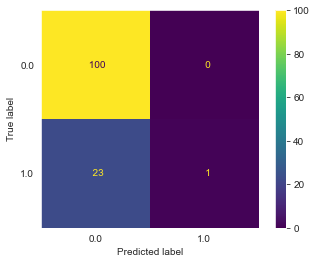

In [49]:
plot_confusion_matrix(xgb,X_test,y_test,values_format='4g')
plt.show()

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.90       100
         1.0       1.00      0.04      0.08        24

    accuracy                           0.81       124
   macro avg       0.91      0.52      0.49       124
weighted avg       0.85      0.81      0.74       124



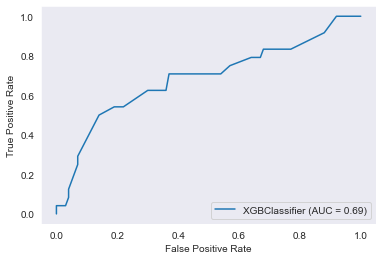

In [51]:
plot_roc_curve(xgb,X_test,y_test)
plt.show()

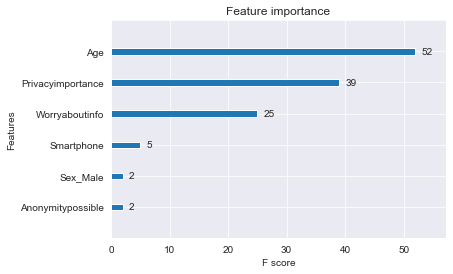

In [52]:
plot_importance(booster=xgb)
plt.show()

### Cross-Validation

In [53]:
cv = cross_val_score(xgb,X,y,scoring='accuracy',cv=5)

In [54]:
cv.mean()

0.6742197744558089

### Model Tuning

In [55]:
model = XGBClassifier()

In [56]:
parameters = {'max_depth': np.arange(4, 10 , 1),
              'min_child_weight': np.arange(1,4,1),
              'gamma':np.arange(0,50,2)
             }

In [57]:
randm = RandomizedSearchCV(estimator=model, param_distributions = parameters, cv = 5, n_iter = 10, n_jobs=-1)

In [58]:
randm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
                   iid='deprecated', n_i

In [59]:
randm.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=42,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [60]:
randm.best_score_

0.7424036281179139

In [61]:
randm.best_params_

{'min_child_weight': 2, 'max_depth': 4, 'gamma': 42}

### New Model

In [67]:
xgbnew = XGBClassifier(random_state=0, n_estimators=500, objective='binary:logistic',max_depth= 4,
                      gamma= 42, min_child_weight= 2)

In [68]:
xgbnew.fit(X_train,y_train,eval_set=[(X_test,y_test)],eval_metric='error',early_stopping_rounds=10)

[0]	validation_0-error:0.193548
Will train until validation_0-error hasn't improved in 10 rounds.
[1]	validation_0-error:0.193548
[2]	validation_0-error:0.193548
[3]	validation_0-error:0.193548
[4]	validation_0-error:0.193548
[5]	validation_0-error:0.193548
[6]	validation_0-error:0.193548
[7]	validation_0-error:0.193548
[8]	validation_0-error:0.193548
[9]	validation_0-error:0.193548
[10]	validation_0-error:0.193548
Stopping. Best iteration:
[0]	validation_0-error:0.193548



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=42,
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=2, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [69]:
y_pred_new = xgbnew.predict(X_test)

In [70]:
y_pred_new

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.])

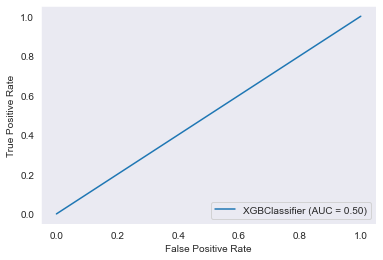

In [71]:
plot_roc_curve(xgbnew,X_test,y_test)
plt.show()